In [ ]:
!pip install darts

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from darts.datasets import MonthlyMilkDataset

In [ ]:
df = MonthlyMilkDataset().load()

In [ ]:
series = MonthlyMilkDataset().load().pd_series()
series

Month
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
1962-05-01    727.0
              ...  
1975-08-01    858.0
1975-09-01    817.0
1975-10-01    827.0
1975-11-01    797.0
1975-12-01    843.0
Freq: MS, Name: Pounds per cow, Length: 168, dtype: float64

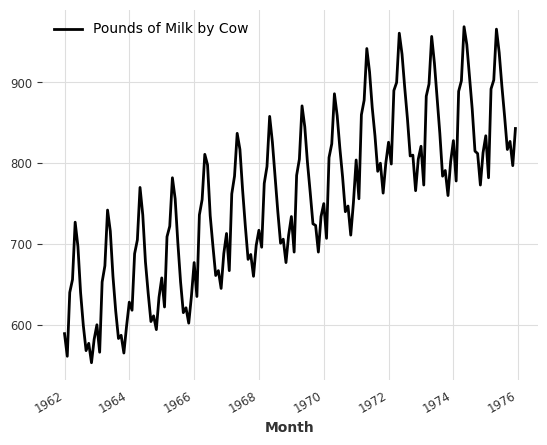

In [ ]:
df.plot(label="Pounds of Milk by Cow")
plt.legend()

In [ ]:
from darts.dataprocessing.transformers import Scaler

In [ ]:
scaler = Scaler()
scaled_df = scaler.fit_transform(df)

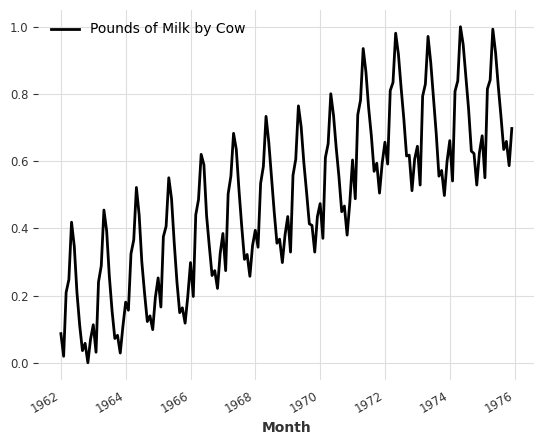

In [ ]:
scaled_df.plot(label="Pounds of Milk by Cow")
plt.legend()

In [ ]:
# Making Last 3 yrs as validation
train, val = scaled_df[:-36], scaled_df[-36:]

In [ ]:
from darts import TimeSeries
#There are many models present in darts
from darts.models import NBEATSModel
from darts.metrics import mape

In [ ]:
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

In [ ]:
model.fit(train, verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

In [ ]:
pred = model.predict(n=36, series=train)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

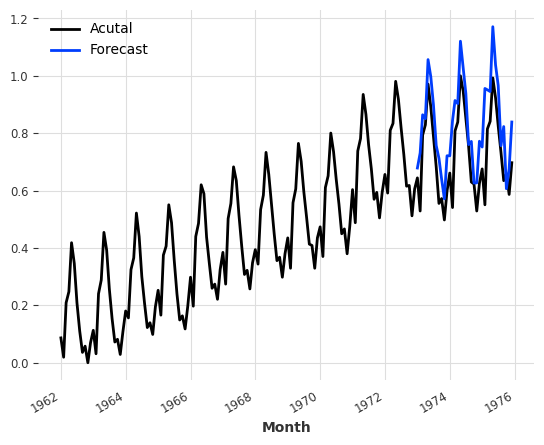

In [ ]:
scaled_df.plot(label="Acutal")
pred.plot(label="Forecast")
plt.legend()

In [ ]:
print(f"MAPE = {mape(scaled_df,pred)}")

MAPE = 16.565106110603182
